In [20]:
import pandas as pd
import numpy as np
import os
import sys
from fbprophet import Prophet
import itertools
import warnings
import cufflinks as cf

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
path=os.path.join(os.path.dirname(os.getcwd()),"code/Wrangled_CSVs")
print(path)
eu=[]
for item in os.listdir(path):
    if item.startswith('fbp'):
        fn=os.path.join(path,item)
        df=pd.read_csv(fn)
        print(fn)
        eu.append(df)

confirmed,recovered,deaths=eu[0],eu[1],eu[2]

/home/Github/COVID-19_Interactive/code/Wrangled_CSVs
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_recovered.csv
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_deaths.csv
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_confirmed.csv


In [27]:
def profet_modeling(df):
    m = Prophet(interval_width=0.95,daily_seasonality=False,yearly_seasonality=False)
    m.fit(df)
    
    future_dates = m.make_future_dataframe(periods=45)
    
    forecast = m.predict(future_dates)
    
    head=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
    tail=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    
    print(head,"\n\n",tail)
    
    fig = Prophet.plot(m,forecast)

          ds         yhat   yhat_lower   yhat_upper
0 2020-01-22 -1915.907327 -6079.952015  2213.099298
1 2020-01-23 -1845.091086 -5877.829650  2177.350401
2 2020-01-24 -1725.963223 -5878.924143  2424.131827
3 2020-01-25 -1334.967900 -5599.822547  2707.981979
4 2020-01-26  -863.005435 -4922.732379  2980.440494 

             ds         yhat   yhat_lower    yhat_upper
102 2020-05-03  8654.422051  4620.978903  12703.305509
103 2020-05-04  8725.191890  4624.710614  12941.124925
104 2020-05-05  7808.324979  3655.203928  12043.062028
105 2020-05-06  8278.836782  4545.945867  12328.441539
106 2020-05-07  8351.126790  4125.990790  12188.932466


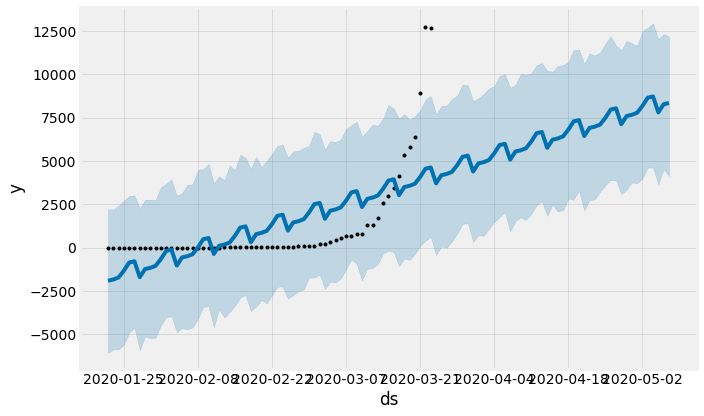

In [28]:
profet_modeling(df=confirmed)

          ds         yhat   yhat_lower   yhat_upper
0 2020-01-22 -1460.663911 -4304.162189  1488.608881
1 2020-01-23 -1366.361668 -4166.648783  1427.120027
2 2020-01-24 -1169.515195 -4231.510658  1970.769881
3 2020-01-25  -981.558463 -3765.753909  1869.125507
4 2020-01-26  -769.725851 -3605.459015  2180.884923 

             ds         yhat   yhat_lower   yhat_upper
102 2020-05-03  6324.412162  3326.734392  9040.566926
103 2020-05-04  6392.184390  3343.067587  9363.970535
104 2020-05-05  5846.517584  2825.973097  9006.014298
105 2020-05-06  6139.165733  2955.289239  9007.650232
106 2020-05-07  6234.084082  3202.402203  9067.645615


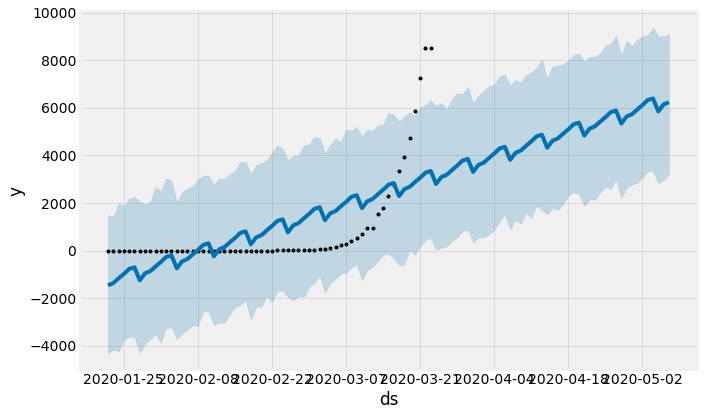

In [29]:
profet_modeling(df=recovered)

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-22 -30091.491965 -85994.703678  30642.767689
1 2020-01-23 -27809.974562 -83861.171909  25265.872576
2 2020-01-24 -23936.360820 -83242.490112  35543.249757
3 2020-01-25 -20531.385060 -75607.105893  35491.311317
4 2020-01-26 -17270.698227 -74443.453028  44572.977940 

             ds           yhat    yhat_lower     yhat_upper
102 2020-05-03  133755.128140  75051.555307  194157.845155
103 2020-05-04  135267.393990  78815.834247  191974.242475
104 2020-05-05  125543.349946  72014.775827  186438.397284
105 2020-05-06  131693.090794  72007.487149  189030.948884
106 2020-05-07  133991.108497  83300.352590  192320.951907


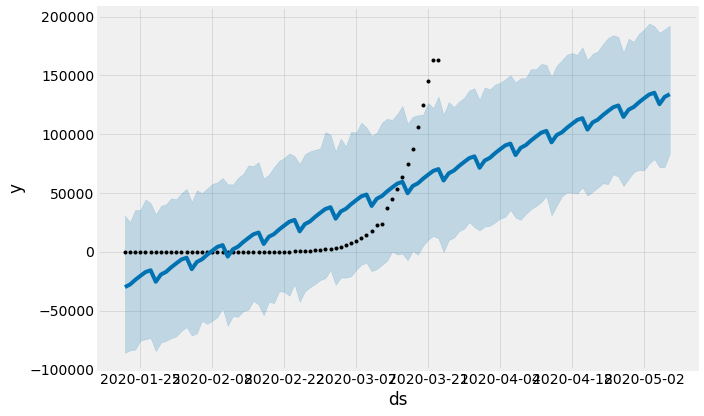

In [30]:
profet_modeling(df=deaths)